# 기본 케라스 구조 및 학습 조기 종료

### 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import tensorflow as tf

np.random.seed(3)

### 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

#### 1.1 훈련셋과 시험셋 로딩

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]        
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print('X_train', X_train.shape)
print('X_train', Y_train.shape)
print('X_train', X_val.shape)
print('X_train', Y_val.shape)

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

X_train (50000, 28, 28)
X_train (50000,)
X_train (10000, 28, 28)
X_train (10000,)


#### 1.2 훈련셋, 검증셋 고르기

In [3]:
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#### 1.3 라벨 데이터 원핫인코딩 처리

In [4]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

### 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [5]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.
#### 4.1 배치사이즈
* 몇 개를  처리하고 해답을 맞추는지를 의미함 
    * 100 : 100개를 처리하고 해답을 맞춤
    * 1: 1개를 처리하고 해답을 맞춤
* 배치사이즈가 작을수록 갱신이 자주 발생함 
#### 4.2 에폭
* 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 학습
* 서로 다른 20문제를 1번 푸는 경우보다 같은 1문제를 20번 푸는 경우 정확도가 높다.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20)          # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 815us/sample - loss: 2.0419 - accuracy: 0.3129 - val_loss: 1.8210 - val_accuracy: 0.5333
Epoch 2/3000
700/700 [==============================] - 0s 182us/sample - loss: 1.5409 - accuracy: 0.6786 - val_loss: 1.3969 - val_accuracy: 0.7200
Epoch 3/3000
700/700 [==============================] - 0s 187us/sample - loss: 1.1772 - accuracy: 0.7900 - val_loss: 1.1068 - val_accuracy: 0.7733
Epoch 4/3000
700/700 [==============================] - 0s 194us/sample - loss: 0.9411 - accuracy: 0.8214 - val_loss: 0.9285 - val_accuracy: 0.8000
Epoch 5/3000
700/700 [==============================] - 0s 189us/sample - loss: 0.7842 - accuracy: 0.8457 - val_loss: 0.8042 - val_accuracy: 0.8300
Epoch 6/3000
700/700 [==============================] - 0s 185us/sample - loss: 0.6788 - accuracy: 0.8614 - val_loss: 0.7365 - val_accuracy: 0.8133
Epoch 7/3000
700/700 [==============================] - 0s 185us/s

### 5. 학습과정 그래프로 확인 
* 히스토리 객체 생성 
    * 매 에포크 마다의 훈련 손실값 (loss)
    * 매 에포크 마다의 훈련 정확도 (acc)
    * 에포크 마다의 검증 손실값 (val_loss)
    * 에포크 마다의 검증 정확도 (val_acc)

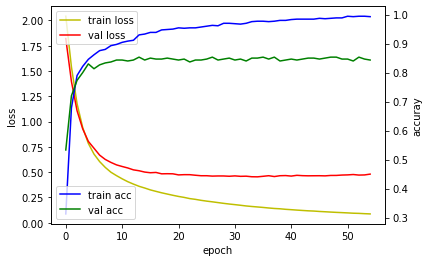

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

In [9]:
print('## training loss and accuracy ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and accuracy ##
[2.0419211881501336, 1.5409253665379115, 1.1771854221820832, 0.9410809934139251, 0.7841743243592126, 0.6788169511726925, 0.6045727116721017, 0.5468997001647949, 0.4994056367448398, 0.4653066309435027, 0.4338944137096405, 0.4055074259638786, 0.381782277567046, 0.35985985643097335, 0.34295848714453836, 0.32433042845555715, 0.30987360190067975, 0.29571038857102394, 0.2832924458597388, 0.27103595499481475, 0.25960704343659535, 0.2500637164073331, 0.23822095984859126, 0.23081263112170355, 0.22120115011930466, 0.21322909205087592, 0.20634417033621244, 0.19885411805340222, 0.19132203592785768, 0.18454416830624853, 0.17862763713513102, 0.17228798467133727, 0.16551255988223212, 0.16026490264173066, 0.15561421875442777, 0.15091095731726714, 0.1453756115266255, 0.14064619498593467, 0.1374890526756644, 0.13236010032040732, 0.1286182037421635, 0.12462563512048551, 0.12093820183404855, 0.11740979113216911, 0.11507339770240443, 0.11105127796264631, 0.10815800014617187

### 7. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [10]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 45us/sample - loss: 0.4099 - accuracy: 0.8765
## evaluation loss and_metrics ##
loss : 0.40992161306738856
accuracy : 0.8765


### 8. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [11]:
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[4.7322857e-05 3.1801980e-07 9.2279763e-05 5.7126595e-05 1.9433016e-06
  2.4763335e-06 1.6186391e-07 9.9790311e-01 1.9174853e-05 1.8761606e-03]]


### 9. 러닝 모델 가시화 기능 확인

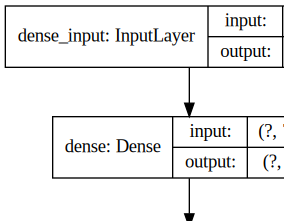

In [12]:
import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 10. 모델 저장과 모델 로딩 

In [13]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')